<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SECTION 1** 

# **PROJECT**

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
files.upload()
print("done")

Saving vgames2.csv to vgames2 (3).csv
done


`Unnamed: 0` 칼럼을 삭제하고 `Year`, `Publisher`, `Genre` Column의 각 결측치를 적절한 값으로 대체

In [2]:
df = pd.read_csv('vgames2.csv')
df = df.drop(columns='Unnamed: 0')

df.Year = df.Year.fillna(9999)
df.Publisher = df.Publisher.fillna('Unknown')
df.Genre = df.Genre.fillna('Misc')

`Year` Column의 이상치(연도표기가 뒤 2자리만 표기된 것에 대한 수정)

In [3]:
df_Year_Clear1 = df[(df['Year']<100) & (df['Year']>=30)]
df_Year_Clear2 = df[(df['Year']<30)]
df_Year_Clear3 = df[(df['Year']>100)]
df_Year_Clear1.Year = df_Year_Clear1.Year + 1900
df_Year_Clear2.Year = df_Year_Clear2.Year + 2000
df = df_Year_Clear1.append(df_Year_Clear2)
df = df.append(df_Year_Clear3)
df = df.sort_index()
df.Year = df.Year.astype('int')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


각 `Sales` Column에 M, K으로 표기되어 있는것들을 단위가 million인 숫자들로 변경함.

- 출고량이 높은(인지도가 높은) 게임들로 판단하였을때, 기존 데이터셋에 표기된 숫자의 기본 단위가 million인 것으로 판단됨.
>ex)
>
>100K -> 0.1 (million)
>
>4M -> 4 (milliom)

In [4]:
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')
df_NA_K = df.NA_Sales[df['NA_Sales'].str.contains('K')].str.replace('K','').astype(float)/1000
df_EU_K = df.EU_Sales[df['EU_Sales'].str.contains('K')].str.replace('K','').astype(float)/1000
df_JP_K = df.JP_Sales[df['JP_Sales'].str.contains('K')].str.replace('K','').astype(float)/1000
df_Other_K = df.Other_Sales[df['Other_Sales'].str.contains('K')].str.replace('K','').astype(float)/1000

df.NA_Sales[df_NA_K.index] = df_NA_K
df.EU_Sales[df_EU_K.index] = df_EU_K
df.JP_Sales[df_JP_K.index] = df_JP_K
df.Other_Sales[df_Other_K.index] = df_Other_K

df = df.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


`Platform`, `Genre`, `Publisher` Column을 category화함. 
- 데이터 양에 비해 해당 데이터들이 가지는 값의 종류가 현저히 적음.

In [5]:
df = df.astype({'Platform':'category', 'Genre':'category', 'Publisher':'category'})
df['Sales_sum'] = df['NA_Sales'] + df['JP_Sales'] + df['EU_Sales'] + df['Other_Sales']

### **지역별 선호 장르**

`Sales`Column들의 데이터 시각화

In [6]:
NA_Genre = df.groupby('Genre').NA_Sales.sum()
EU_Genre = df.groupby('Genre').EU_Sales.sum()
JP_Genre = df.groupby('Genre').JP_Sales.sum()
Other_Genre = df.groupby('Genre').Other_Sales.sum()
label = df.Genre.values.categories
index = np.arange(len(label))

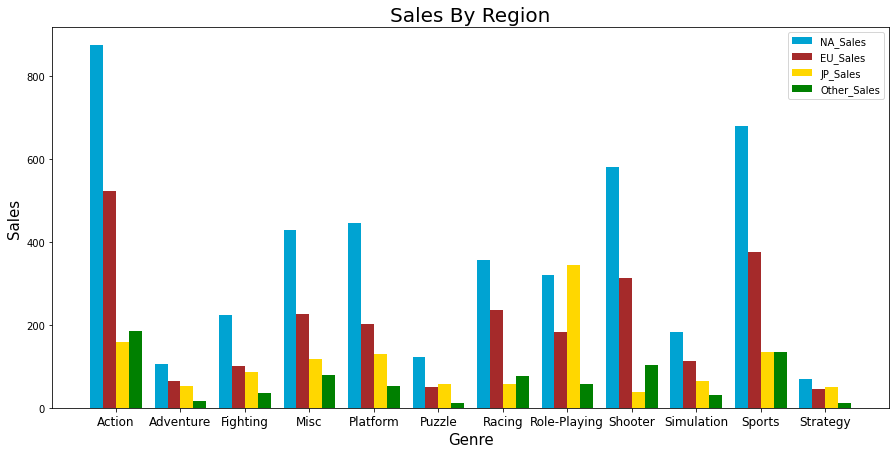

In [7]:
plt.figure(figsize=(15, 7))
w = 0.2
plt.bar(index-1.5*w, NA_Genre,width=w,label = 'NA_Sales', color = ['#00A3D2'])
plt.bar(index-0.5*w, EU_Genre,width=w,label = 'EU_Sales', color = ['brown'])
plt.bar(index+0.5*w, JP_Genre,width=w,label = 'JP_Sales', color = ['gold'])
plt.bar(index+1.5*w, Other_Genre,width=w,label = 'Other_Sales', color = ['green'])
plt.title('Sales By Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

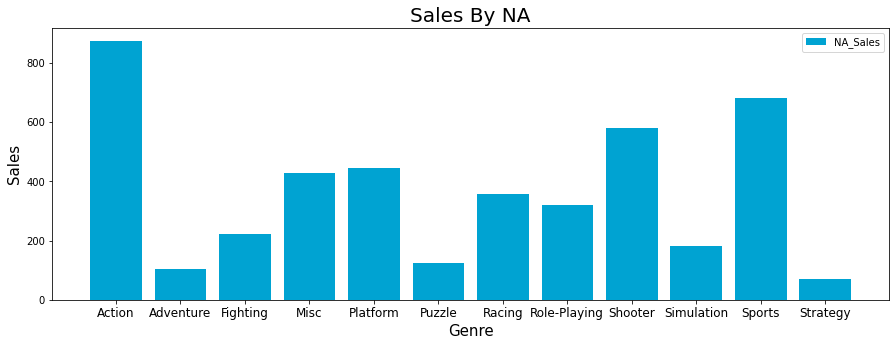

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(index, NA_Genre,width=0.8,label = 'NA_Sales', color = ['#00A3D2'])
plt.title('Sales By NA', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

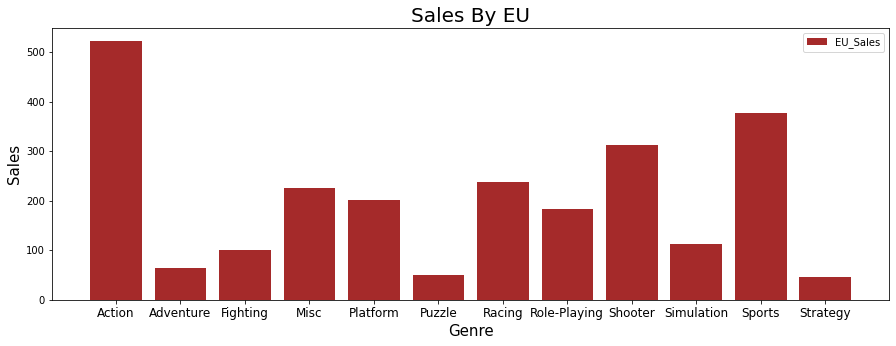

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(index, EU_Genre,width=0.8,label = 'EU_Sales', color = ['brown'])
plt.title('Sales By EU', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

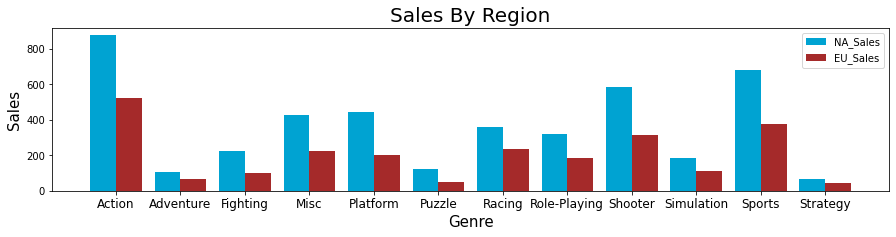

In [10]:
plt.figure(figsize=(15, 3))
w = 0.4
plt.bar(index-0.5*w, NA_Genre,width=w,label = 'NA_Sales', color = ['#00A3D2'])
plt.bar(index+0.5*w, EU_Genre,width=w,label = 'EU_Sales', color = ['brown'])
plt.title('Sales By Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

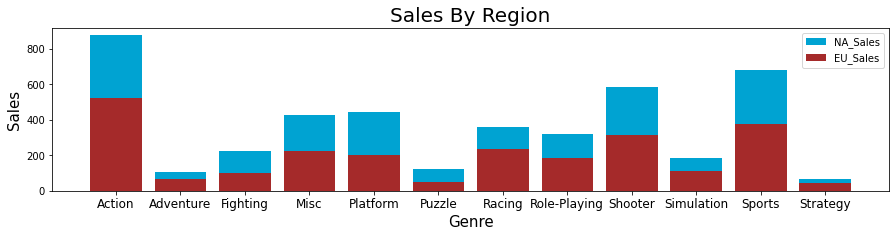

In [11]:
plt.figure(figsize=(15,3))
w = 0.8
plt.bar(index, NA_Genre,width=w,label = 'NA_Sales', color = ['#00A3D2'])
plt.bar(index, EU_Genre,width=w,label = 'EU_Sales', color = ['brown'])
plt.title('Sales By Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

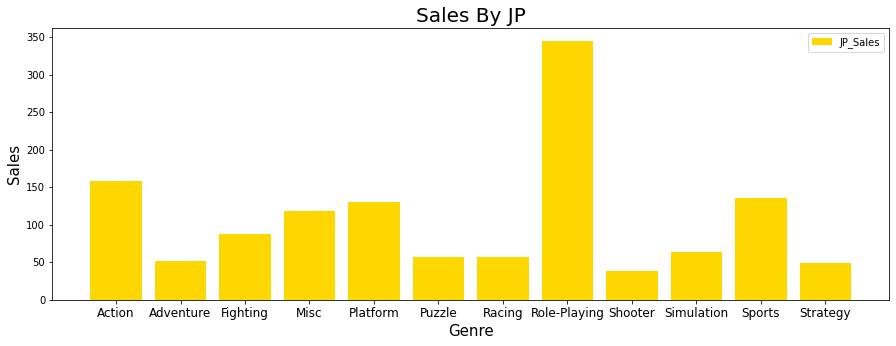

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(index, JP_Genre,width=0.8,label = 'JP_Sales', color = ['gold'])
plt.title('Sales By JP', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

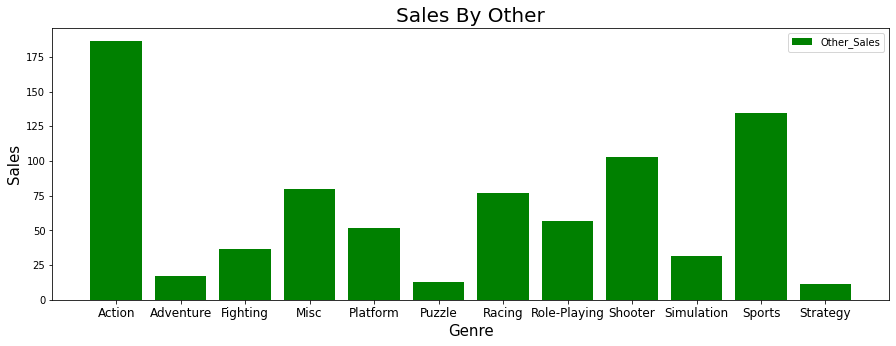

In [13]:
plt.figure(figsize=(15, 5))
plt.bar(index, Other_Genre,width=0.8,label = 'Other_Sales', color = ['green'])
plt.title('Sales By Other', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

### **연도별 게임의 트렌드**

In [14]:
df.Year = df.Year.astype('category')

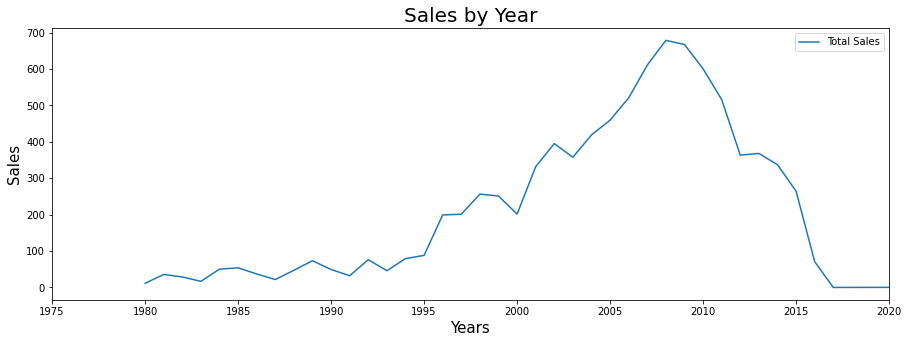

In [15]:
df_Genre_Year = df.groupby(['Year', 'Genre']).Sales_sum.sum()
df_pivot = df_Genre_Year.unstack()
df_p_index = np.array(df_pivot.index)
df_p_columns = np.array(df_pivot.columns)

plt.figure(figsize=(15, 5))
plt.xlim(1975, 2020)
plt.title('Sales by Year', fontsize=20)
plt.plot(df_p_index, df_pivot.sum(axis = 1), label = 'Total Sales')
plt.xlabel('Years', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.legend()
plt.show()

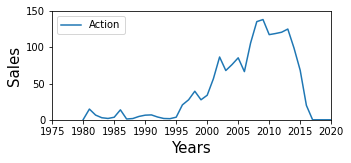

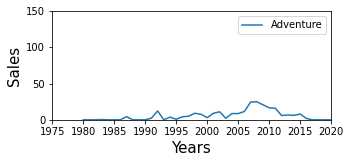

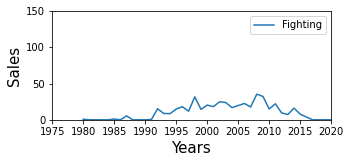

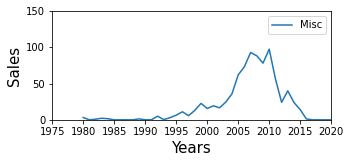

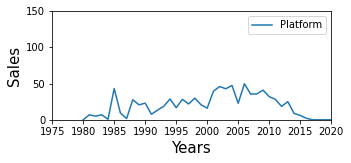

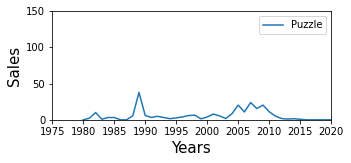

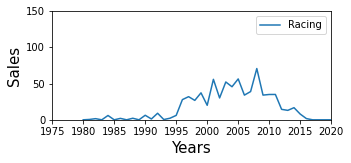

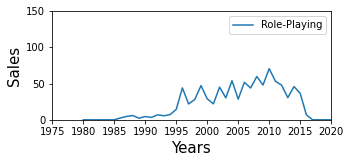

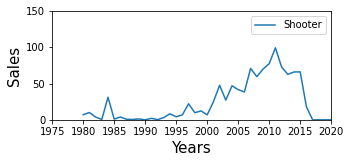

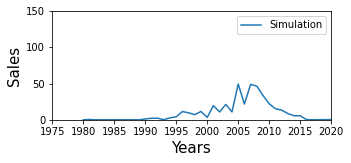

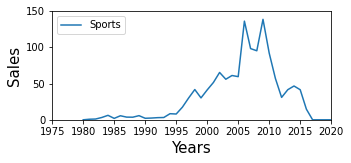

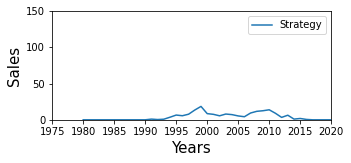

In [16]:
def print_graph_genre(i):
  plt.figure(figsize=(5, 2))
  plt.xlim(1975, 2020)
  plt.ylim(0, 150)
  plt.plot(df_p_index, np.array(df_pivot.iloc[:,[i]]),label = df_pivot.columns[i])
  plt.xlabel('Years', fontsize=15)
  plt.ylabel('Sales', fontsize=15)
  plt.legend()
  plt.show()

for i in range(12):
  print_graph_genre(i)

### **지역별 총 판매량**

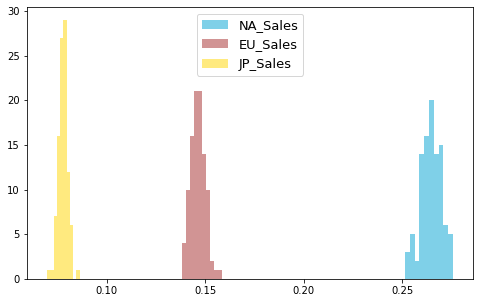

In [17]:
np.random.seed(10)

NA_Sales_means, EU_Sales_means, JP_Sales_means, diff_means_NA_EU, diff_means_NA_JP = [], [], [], [], []
for _ in range(100):
  sample = df.sample(df.shape[0], replace=True)
  
  NA_Sales_mean = sample.NA_Sales.mean()
  NA_Sales_means.append(NA_Sales_mean)

  EU_Sales_mean = sample.EU_Sales.mean()
  EU_Sales_means.append(EU_Sales_mean)

  JP_Sales_mean = sample.JP_Sales.mean()
  JP_Sales_means.append(JP_Sales_mean)

  diff_means_NA_EU.append(NA_Sales_mean - EU_Sales_mean)
  diff_means_NA_JP.append(NA_Sales_mean - JP_Sales_mean)

plt.figure(figsize=(8,5))
plt.hist(NA_Sales_means, alpha = 0.5, label='NA_Sales', color = '#00A3D2')
plt.hist(EU_Sales_means, alpha = 0.5, label = 'EU_Sales', color = 'brown')
plt.hist(JP_Sales_means, alpha = 0.5, label = 'JP_Sales', color = 'gold')
plt.legend(loc=9, fontsize=13)
plt.show()

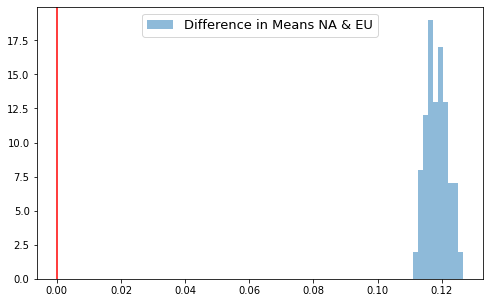

In [18]:
plt.figure(figsize=(8,5))
plt.hist(diff_means_NA_EU, alpha=0.5, label = 'Difference in Means NA & EU')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

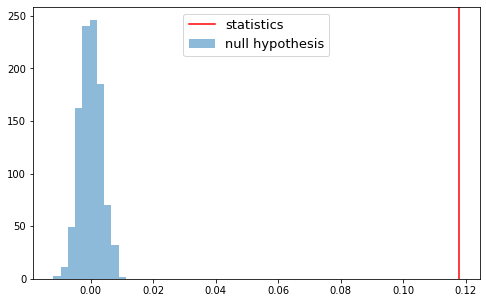

In [19]:
NA_EU_diff_mean = df.NA_Sales.mean() - df.EU_Sales.mean()
NA_EU_diff_std = np.std(diff_means_NA_EU)#표준편차
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, NA_EU_diff_std, 1000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(NA_EU_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)
plt.show()

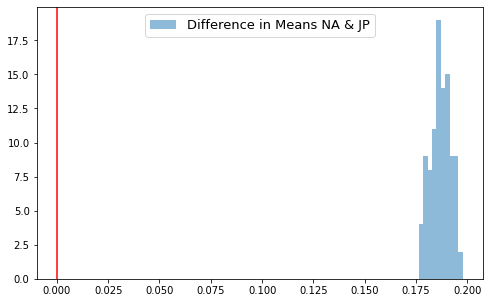

In [20]:
plt.figure(figsize=(8,5))
plt.hist(diff_means_NA_JP, alpha=0.5, label = 'Difference in Means NA & JP')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

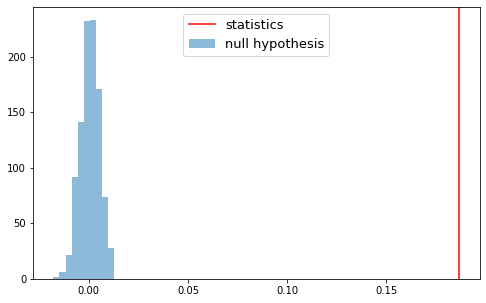

In [21]:
NA_JP_diff_mean = df.NA_Sales.mean() - df.JP_Sales.mean()
NA_JP_diff_std = np.std(diff_means_NA_JP)
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, NA_JP_diff_std, 1000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(NA_JP_diff_mean, color='r', label='statistics')
plt.legend(loc=9, fontsize=13)
plt.show()

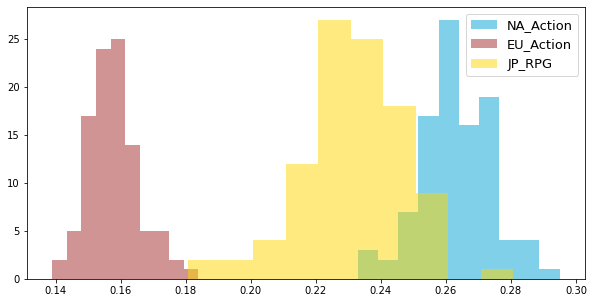

In [22]:
np.random.seed(10)

NA_Action_means, EU_Action_means, JP_RPG_means, diff_NA_Action_EU_Action, diff_means_NA_Action_JP_RPG = [], [], [], [], []
for _ in range(100):
  sample = df.sample(df.shape[0], replace=True)
  
  NA_Sales_mean = sample[sample.Genre == 'Action'].NA_Sales.mean()
  NA_Action_means.append(NA_Sales_mean)

  EU_Sales_mean = sample[sample.Genre == 'Action'].EU_Sales.mean()
  EU_Action_means.append(EU_Sales_mean)

  JP_Sales_mean = sample[sample.Genre == 'Role-Playing'].JP_Sales.mean()
  JP_RPG_means.append(JP_Sales_mean)

  diff_NA_Action_EU_Action.append(NA_Sales_mean - EU_Sales_mean)
  diff_means_NA_Action_JP_RPG.append(NA_Sales_mean - JP_Sales_mean)

plt.figure(figsize=(10,5))
plt.hist(NA_Action_means, alpha = 0.5, label='NA_Action', color = '#00A3D2')
plt.hist(EU_Action_means, alpha = 0.5, label = 'EU_Action', color = 'brown')
plt.hist(JP_RPG_means, alpha = 0.5, label = 'JP_RPG', color = 'gold')
plt.legend(loc=1, fontsize=13)
plt.show()

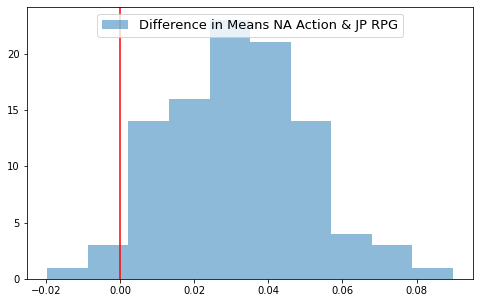

In [23]:
plt.figure(figsize=(8,5))
plt.hist(diff_means_NA_Action_JP_RPG, alpha=0.5, label = 'Difference in Means NA Action & JP RPG')
plt.axvline(0, c='r')
plt.legend(loc=9, fontsize=13);

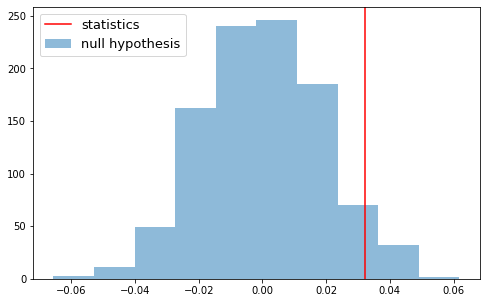

In [24]:
NA_JP_diff_mean = df[df.Genre == 'Action'].NA_Sales.mean() - df[df.Genre == 'Role-Playing'].JP_Sales.mean()
NA_JP_diff_std = np.std(diff_means_NA_Action_JP_RPG)
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, NA_JP_diff_std, 1000) 
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(NA_JP_diff_mean, color='r', label='statistics')
plt.legend(fontsize=13)
plt.show()

### **장르별 가장 유명한 게임**

In [25]:
Action_OP = df[df.Genre == 'Action']
Action_OP = Action_OP[Action_OP.Sales_sum > 10]
Action_OP

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9786,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
13926,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58


In [26]:
GTA = df[df['Name'].str.contains('Grand Theft Auto')]
GTA = GTA[GTA['Genre']=='Action']
GTA.Sales_sum.sum()

160.63000000000002

In [27]:
RPG_OP = df[df.Genre == 'Role-Playing']
# RPG_OP = RPG_OP[RPG_OP.JP_Sales > 5]
RPG_OP = RPG_OP[RPG_OP.Sales_sum > 10]
RPG_OP

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84


In [28]:
Poke = df[df['Name'].str.contains('Pokemon')]
Poke = Poke[Poke['Genre']=='Role-Playing']
Poke.Sales_sum.sum()

154.87

In [29]:
Shooter_OP = df[df.Genre == 'Shooter']
# RPG_OP = RPG_OP[RPG_OP.JP_Sales > 5]
Shooter_OP = Shooter_OP[Shooter_OP.Sales_sum > 10]
Shooter_OP

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
6236,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.52
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
6291,Halo 3,X360,2007,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
8374,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
9924,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73


In [30]:
CoD = df[df['Name'].str.contains('Call of Duty')]
CoD = CoD[CoD['Genre']=='Shooter']
CoD.Sales_sum.sum()

245.74

In [31]:
Sports_OP = df[df.Genre == 'Sports']
# RPG_OP = RPG_OP[RPG_OP.JP_Sales > 5]
Sports_OP = Sports_OP[Sports_OP.Sales_sum > 8]
Sports_OP

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3435,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
8482,Mario & Sonic at the Olympic Games,Wii,2007,Sports,Sega,2.58,3.90,0.66,0.91,8.05
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [32]:
Wii = df[df['Name'].str.contains('Wii')]
Wii = Wii[Wii['Genre']=='Sports']
Wii.Sales_sum.sum()

162.26

In [33]:
df_dropped = df.drop(GTA.index)
df_dropped = df_dropped.drop(Poke.index)
df_dropped = df_dropped.drop(CoD.index)
df_dropped = df_dropped.drop(Wii.index)
df_dropped.reset_index(inplace = True)

## **장르별 가장 유명한 게임 제거 후 데이터**

### **지역별 선호 장르**

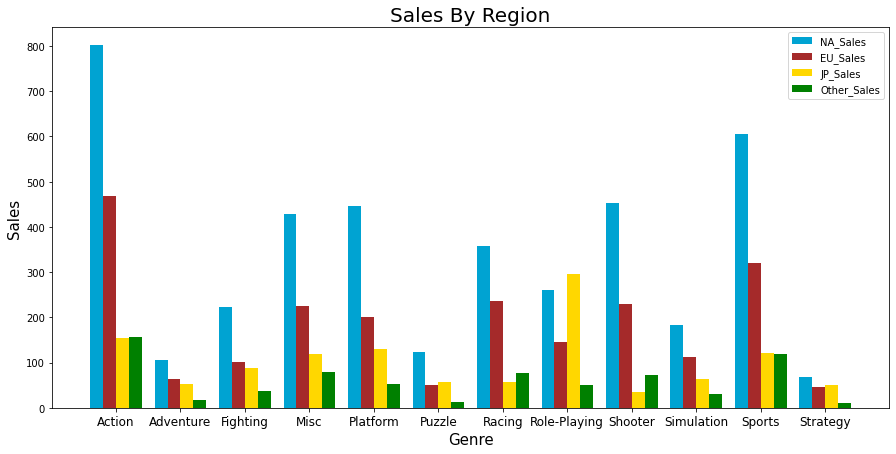

In [34]:
NA_Genre = df_dropped.groupby('Genre').NA_Sales.sum()
EU_Genre = df_dropped.groupby('Genre').EU_Sales.sum()
JP_Genre = df_dropped.groupby('Genre').JP_Sales.sum()
Other_Genre = df_dropped.groupby('Genre').Other_Sales.sum()
label = df_dropped.Genre.values.categories
index = np.arange(len(label))

plt.figure(figsize=(15, 7))
w = 0.2
plt.bar(index-1.5*w, NA_Genre,width=w,label = 'NA_Sales', color = ['#00A3D2'])
plt.bar(index-0.5*w, EU_Genre,width=w,label = 'EU_Sales', color = ['brown'])
plt.bar(index+0.5*w, JP_Genre,width=w,label = 'JP_Sales', color = ['gold'])
plt.bar(index+1.5*w, Other_Genre,width=w,label = 'Other_Sales', color = ['green'])
plt.title('Sales By Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

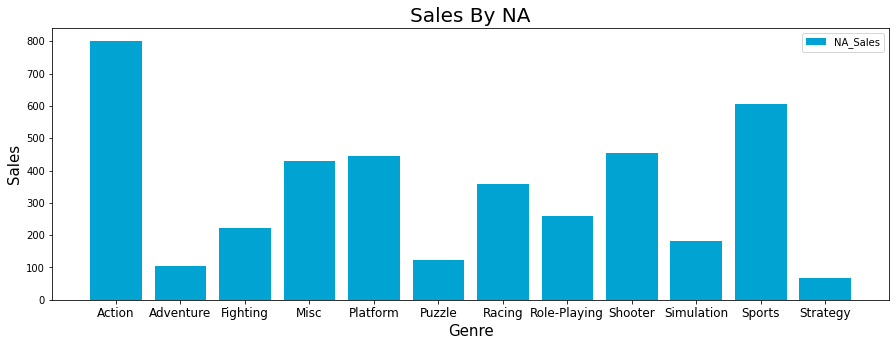

In [35]:
plt.figure(figsize=(15, 5))
plt.bar(index, NA_Genre,width=0.8,label = 'NA_Sales', color = ['#00A3D2'])
plt.title('Sales By NA', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

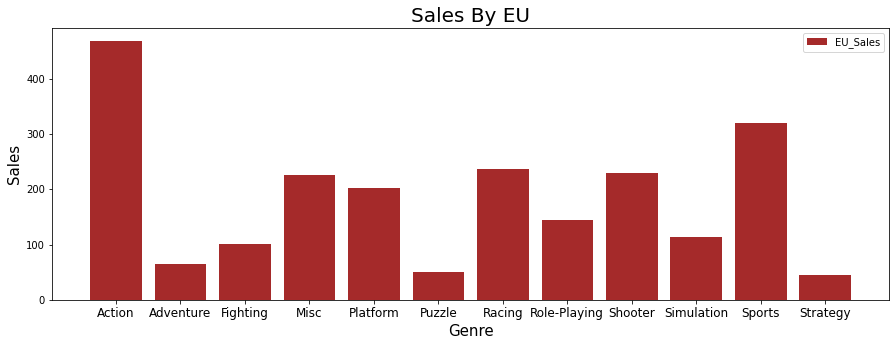

In [36]:
plt.figure(figsize=(15, 5))
plt.bar(index, EU_Genre,width=0.8,label = 'EU_Sales', color = ['brown'])
plt.title('Sales By EU', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

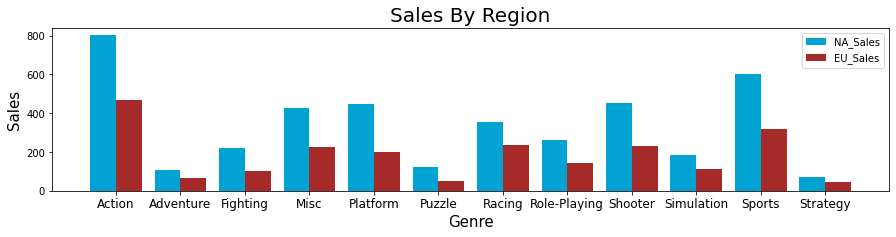

In [37]:
plt.figure(figsize=(15, 3))
w = 0.4
plt.bar(index-0.5*w, NA_Genre,width=w,label = 'NA_Sales', color = ['#00A3D2'])
plt.bar(index+0.5*w, EU_Genre,width=w,label = 'EU_Sales', color = ['brown'])
plt.title('Sales By Region', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

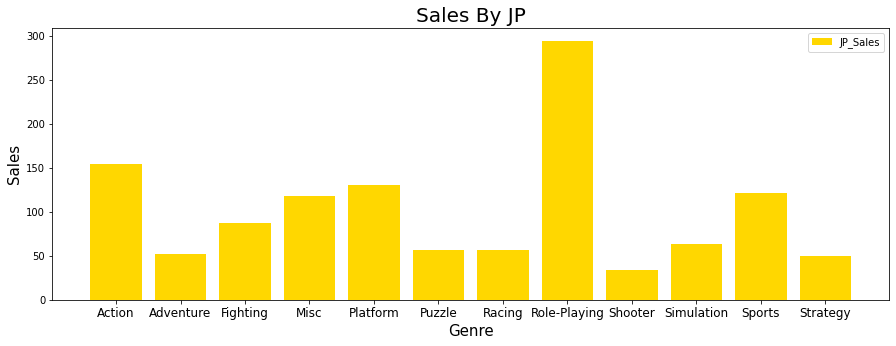

In [38]:
plt.figure(figsize=(15, 5))
plt.bar(index, JP_Genre,width=0.8,label = 'JP_Sales', color = ['gold'])
plt.title('Sales By JP', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

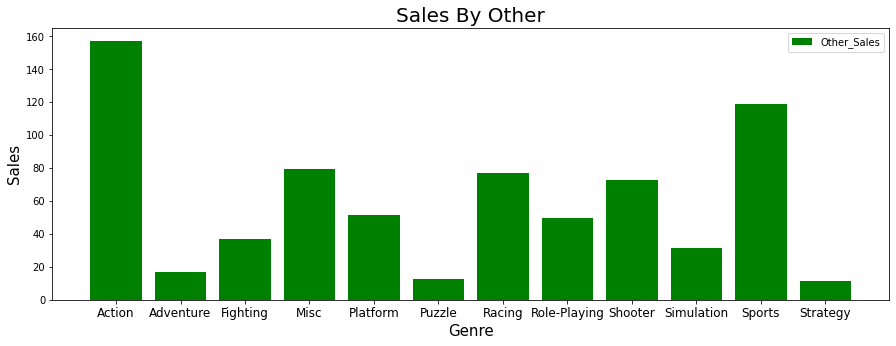

In [39]:
plt.figure(figsize=(15, 5))
plt.bar(index, Other_Genre,width=0.8,label = 'Other_Sales', color = ['green'])
plt.title('Sales By Other', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xticks(index, label, fontsize=12)

plt.legend()
plt.show()

### **지역별 게임 판매량**

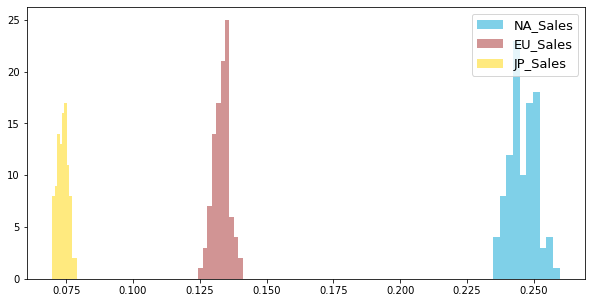

In [40]:
np.random.seed(10)

NA_Sales_means, EU_Sales_means, JP_Sales_means, diff_means_NA_EU, diff_means_NA_JP = [], [], [], [], []
for _ in range(100):
  sample = df_dropped.sample(df_dropped.shape[0], replace=True)
  
  NA_Sales_mean = sample.NA_Sales.mean()
  NA_Sales_means.append(NA_Sales_mean)

  EU_Sales_mean = sample.EU_Sales.mean()
  EU_Sales_means.append(EU_Sales_mean)

  JP_Sales_mean = sample.JP_Sales.mean()
  JP_Sales_means.append(JP_Sales_mean)

  diff_means_NA_EU.append(NA_Sales_mean - EU_Sales_mean)
  diff_means_NA_JP.append(NA_Sales_mean - JP_Sales_mean)

plt.figure(figsize=(10,5))
plt.hist(NA_Sales_means, alpha = 0.5, label='NA_Sales', color = '#00A3D2')
plt.hist(EU_Sales_means, alpha = 0.5, label = 'EU_Sales', color = 'brown')
plt.hist(JP_Sales_means, alpha = 0.5, label = 'JP_Sales', color = 'gold')
plt.legend(loc=1, fontsize=13)
plt.show()

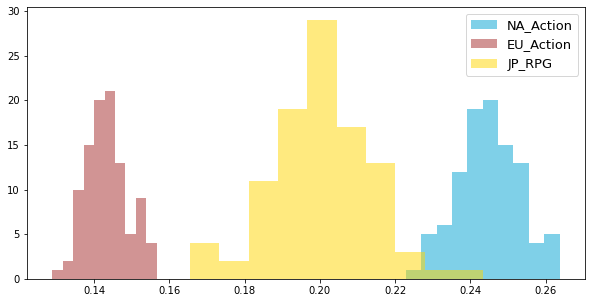

In [53]:
np.random.seed(10)

NA_Action_means, EU_Action_means, JP_RPG_means, diff_NA_Action_EU_Action, diff_means_NA_Action_JP_RPG = [], [], [], [], []
NA_EU_SUM_means, diff_means_NA_EU_Action_JP_RPG = [],[]
for _ in range(100):
  sample = df_dropped.sample(df_dropped.shape[0], replace=True)
  
  NA_Sales_mean = sample[sample.Genre == 'Action'].NA_Sales.mean()
  NA_Action_means.append(NA_Sales_mean)

  EU_Sales_mean = sample[sample.Genre == 'Action'].EU_Sales.mean()
  EU_Action_means.append(EU_Sales_mean)

  JP_Sales_mean = sample[sample.Genre == 'Role-Playing'].JP_Sales.mean()
  JP_RPG_means.append(JP_Sales_mean)

  NA_EU_SUM_mean = NA_Sales_mean + EU_Sales_mean
  NA_EU_SUM_means.append(NA_EU_SUM_mean)

  diff_NA_Action_EU_Action.append(NA_Sales_mean - EU_Sales_mean)
  diff_means_NA_Action_JP_RPG.append(NA_Sales_mean - JP_Sales_mean)
  diff_means_NA_EU_Action_JP_RPG.append(NA_EU_SUM_mean - JP_Sales_mean)

plt.figure(figsize=(10,5))
plt.hist(NA_Action_means, alpha = 0.5, label='NA_Action', color = '#00A3D2')
plt.hist(EU_Action_means, alpha = 0.5, label = 'EU_Action', color = 'brown')
plt.hist(JP_RPG_means, alpha = 0.5, label = 'JP_RPG', color = 'gold')
plt.legend(loc=1, fontsize=13)
plt.show()

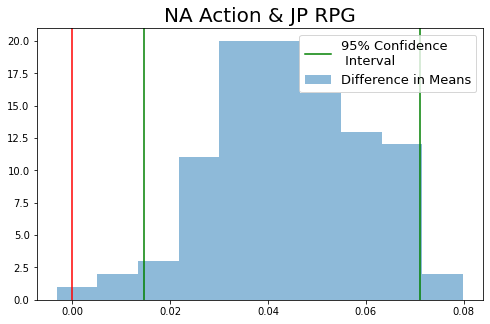

In [52]:
low, upper = np.percentile(diff_means_NA_Action_JP_RPG, 2.5),np.percentile(diff_means_NA_Action_JP_RPG, 97.5) 
plt.figure(figsize=(8,5))
plt.hist(diff_means_NA_Action_JP_RPG, alpha=0.5, label = 'Difference in Means')
plt.title('NA Action & JP RPG', fontsize=20)
plt.axvline(x=low, color='g')
plt.axvline(x=upper, color='g', label='95% Confidence \n Interval')
plt.axvline(0, c='r')
plt.legend(fontsize=13);

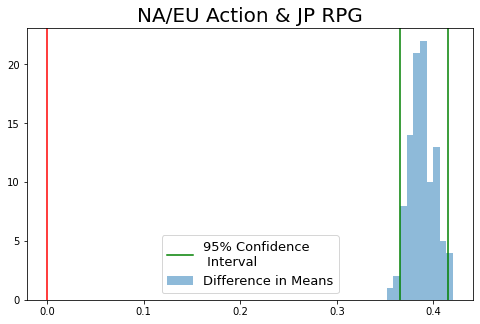

In [55]:
low, upper = np.percentile(NA_EU_SUM_means, 2.5),np.percentile(NA_EU_SUM_means, 97.5) 
plt.figure(figsize=(8,5))
plt.hist(NA_EU_SUM_means, alpha=0.5, label = 'Difference in Means')
plt.title('NA/EU Action & JP RPG', fontsize=20)
plt.axvline(x=low, color='g')
plt.axvline(x=upper, color='g', label='95% Confidence \n Interval')
plt.axvline(0, c='r')
plt.legend(fontsize=13);

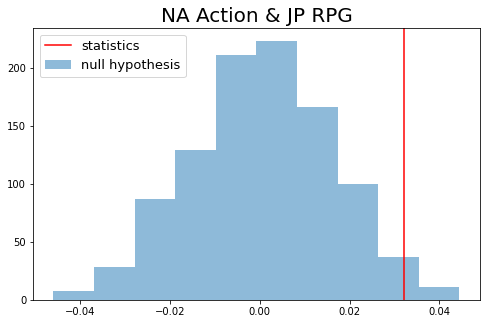

In [47]:
NA_JP_diff_mean = df[df.Genre == 'Action'].NA_Sales.mean() - df[df.Genre == 'Role-Playing'].JP_Sales.mean()
NA_JP_diff_std = np.std(diff_means_NA_Action_JP_RPG)
plt.figure(figsize=(8,5))
null_vals = np.random.normal(0, NA_JP_diff_std, 1000) 
plt.title('NA Action & JP RPG', fontsize=20)
plt.hist(null_vals, alpha=0.5, label='null hypothesis')
plt.axvline(NA_JP_diff_mean, color='r', label='statistics')
plt.legend(fontsize=13)
plt.show()